In [ ]:
import numpy as np
import tcbench as tcb
from functions import (build_faiss_index, 
                       search_and_compare_labels, 
                       extract_results_per_class,
                       plot_results_by_sample_size_per_class)

In [2]:
vectors_baseline = np.load('artifacts-mirage19/baseline_vectors.npy')
labels_baseline = np.load('artifacts-mirage19/baseline_labels.npy')
vectors_embeddings = np.load('artifacts-mirage19/embeddings_vectors.npy')
labels_embeddings = np.load('artifacts-mirage19/embeddings_labels.npy')

In [3]:
df_split = tcb.load_parquet(tcb.DATASETS.MIRAGE19, min_pkts=10, split=True)
train_val_indices = np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]])
test_indices = df_split.iloc[0][2]

In [4]:
index_baseline, selected_indices_baseline = build_faiss_index(vectors_baseline, labels_baseline, train_val_indices, 'euclidean', None)
classified_percentage_baseline, match_percentage_baseline, min_distances_baseline = search_and_compare_labels(vectors_baseline, labels_baseline, test_indices, selected_indices_baseline, index_baseline, "distance", None)
print("Baseline - Classified Percentage:", classified_percentage_baseline)
print("Baseline - Match Percentage:", match_percentage_baseline)

Baseline - Classified Percentage: 100.0
Baseline - Match Percentage: 63.867248363976316


In [5]:
index_embeddings, selected_indices_embeddings = build_faiss_index(vectors_embeddings, labels_embeddings, train_val_indices, 'euclidean', None)
classified_percentage_embeddings, match_percentage_embeddings, min_distances_embeddings = search_and_compare_labels(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings, index_embeddings, "distance", None)
print("Embeddings - Classified Percentage:", classified_percentage_embeddings)  
print("Embeddings - Match Percentage:", match_percentage_embeddings)

Embeddings - Classified Percentage: 100.0
Embeddings - Match Percentage: 79.38610158928014


In [6]:
index_embeddings_cosine, selected_indices_embeddings_cosine = build_faiss_index(vectors_embeddings, labels_embeddings, train_val_indices, 'cosine', None)
classified_percentage_embeddings_cosine, match_percentage_embeddings_cosine, min_distances_embeddings_cosine = search_and_compare_labels(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings_cosine, index_embeddings_cosine, "similarity", None)
print("Embeddings Cosine - Classified Percentage:", classified_percentage_embeddings_cosine)    
print("Embeddings Cosine - Match Percentage:", match_percentage_embeddings_cosine)

Embeddings Cosine - Classified Percentage: 100.0
Embeddings Cosine - Match Percentage: 80.91305702711125


In [7]:
samples = [10, 100, 1000]

distances_baseline = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
distances_embeddings = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
similarities = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
                0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]

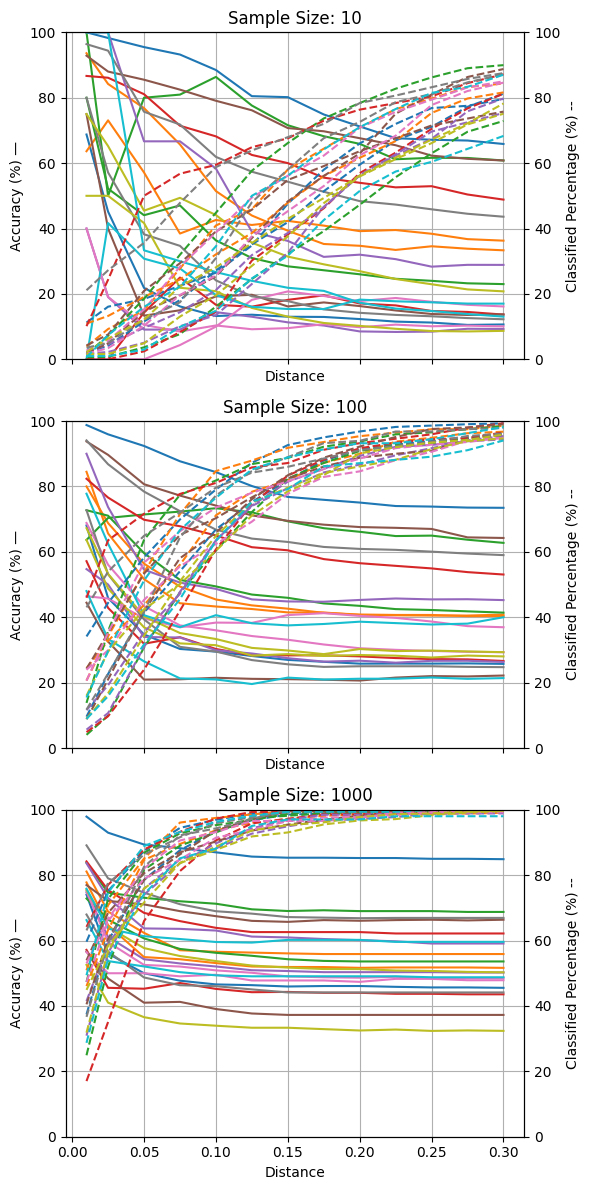

In [8]:
classified_results_baseline_per_class, accuracy_results_baseline_per_class = extract_results_per_class(vectors_baseline, labels_baseline, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_baseline)
plot_results_by_sample_size_per_class(classified_results_baseline_per_class, accuracy_results_baseline_per_class, samples, distances_baseline)

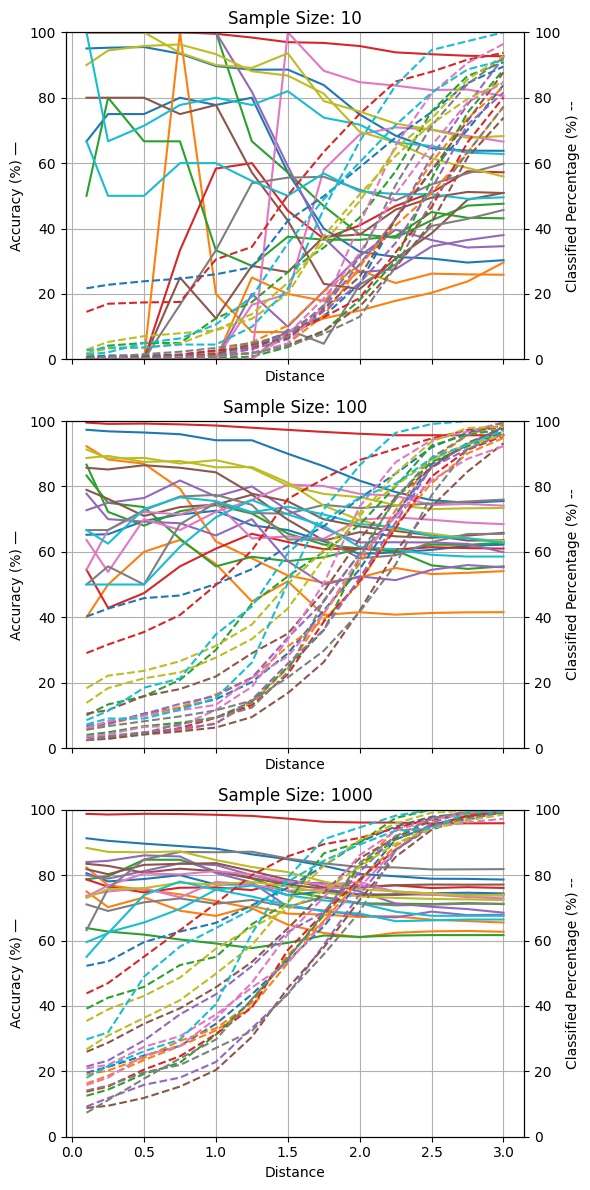

In [9]:
classified_results_embeddings_per_class, accuracy_results_embeddings_per_class = extract_results_per_class(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_embeddings)
plot_results_by_sample_size_per_class(classified_results_embeddings_per_class, accuracy_results_embeddings_per_class, samples, distances_embeddings)

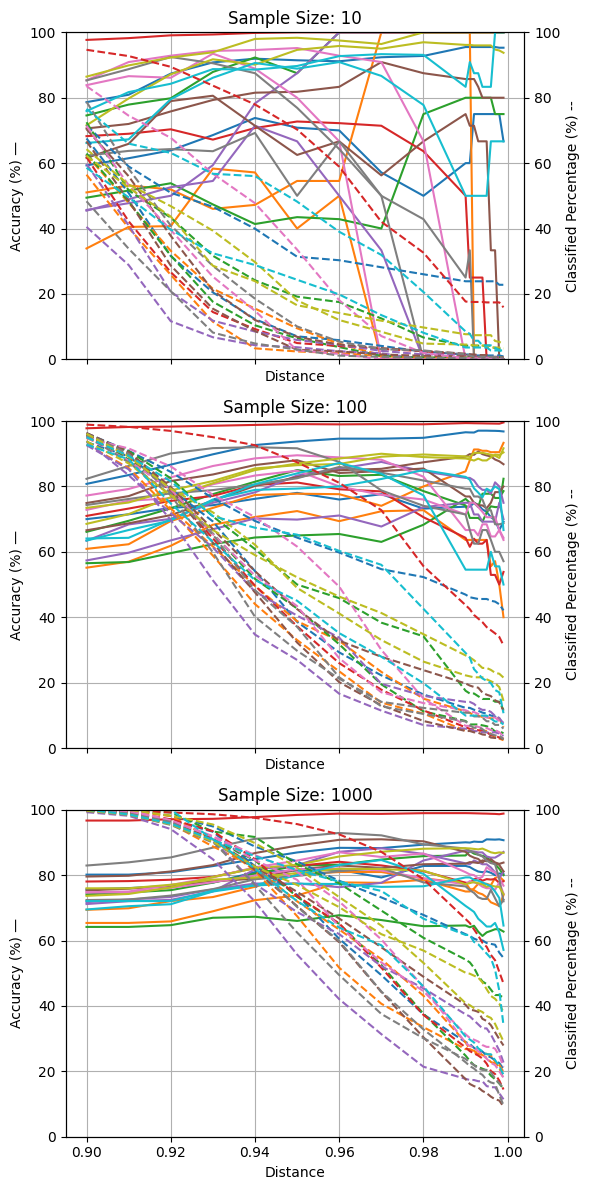

In [10]:
classified_results_embeddings_cosine_per_class, accuracy_results_embeddings_cosine_per_class = extract_results_per_class(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'cosine', 'similarity', samples, similarities)
plot_results_by_sample_size_per_class(classified_results_embeddings_cosine_per_class, accuracy_results_embeddings_cosine_per_class, samples, similarities)